# 最小二乘法

最小二乘法又称为最小平方法，是一种数学优化建模方法。它通过最小化误差的平方和寻找数据的最佳函数匹配。最小二乘法是对线性方程组，即方程个数比未知数更多的方程组，以回归分析求得近似解的标准方法。在这个解决方案中，最小二乘法演算为每一方程的结果中，将残差平方和的总和最小化。

最小二乘法分为线性和非线性，取决于所有未知数中的残差是否为线性。线性的最小二乘问题发生在统计回归分析中，具有一个封闭形式的解决方案。非线性的问题通常由迭代细致化来解决，每次迭代中，系统由线性近似，因此这两种情况下核心演算是相同的。

## 1  历史背景

最小二乘法发展于天文学和大地测量学领域，科学家和数学家尝试为大航海探索时期的海洋航行挑战提供解决方案。准确描述天体的行为是船舰在大海洋上航行的关键，水手不能再依靠陆上目标导航作航行。

这个方法是在十八世纪期间一些进步的集大成：
* 不同观测值的组合是真实值的最佳估计；多次观测会减少误差而不是增加，也许在1722年由Roger Cotes首先阐明。
* 在相同条件下采取的不同观察结果，与只尝试记录一次最精确的观察结果是对立的。这个方法被称为平均值方法。托马斯·马耶尔（Tobias Mayer）在1750年研究月球的天平动时，特别使用这种方法，而拉普拉斯（Pierre-Simon Laplace）在1788年他的工作成果中以此解释木星和土星的运动差异。
* 在不同条件下进行的不同观测值组合。该方法被称为最小绝对偏差法，出现在Roger Joseph Boscovich在1757年他对地球形体的著名作品，而拉普拉斯在1799年也表示了同样的问题。
* 评定对误差达到最小的解决方案标准，拉普拉斯指明了误差的概率密度的数学形式，并定义了误差最小化的估计方法。为此，拉普拉斯使用了一双边对称的指数分布，现在称为拉普拉斯分布作为误差分布的模型，并将绝对偏差之和作为估计误差。他认为这是他最简单的假设，他期待得出算术平均值而成为最佳的估计。可相反地，他的估计是后验中位数。

1801年，意大利天文学家朱塞普·皮亚齐发现了第一颗小行星谷神星。经过40天的追踪观测后，由于谷神星运行至太阳背后，使得皮亚齐失去了谷神星的位置。随后全世界的科学家利用皮亚齐的观测数据开始寻找谷神星，但是根据大多数人计算的结果来寻找谷神星都没有结果。当年24岁的高斯也计算了谷神星的轨道。奥地利天文学家海因里希·奥伯斯根据高斯计算出来的轨道重新发现了谷神星。

高斯使用的最小二乘法的方法发表于1809年他的著作《天体运动论》中，而法国科学家勒让德于1806年独立发现“最小二乘法”，但因不为世人所知而没没无闻。两人曾为谁最早创立最小二乘法原理发生争执。

1829年，高斯提供了最小二乘法的优化效果强于其他方法的证明，见高斯-马尔可夫定理。

## 2  问题引入

如果对同一目标例如手机宽度通过尺子测量长度，通过同一尺子不同测量员或者不同尺子同一测量员得到的结果都有可能不同，那么如何通过所有的测量结果来得到准确的真值呢？

假设测量结果分别为72.5mm、72.2mm、72.9mm、72.4mm、72.5mm。

只要做过初中物理实验的都知道，通常都会对同一实验进行多次重复操作，把得到的结果进行平均求和，最后的结果作为实验的准确结果

$$\overline{x}=\frac{72.5+72.2+72.9+72.4+72.5}{5}=72.5$$

直觉告诉我们取平均值是正确的，那么这么做得依据是什么呢？

再比如，我们知道营业税税收总额与社会商品零售总额有关，假设收集了如下数据

| 序号  | 社会商品零售总额 | 营业税税收总额 |
| :---: | :--------------: | :------------: |
|   1   |      142.08      |      3.93      |
|   2   |      177.30      |      5.96      |
|   3   |      204.68      |      7.85      |
|   4   |      242.88      |      9.82      |
|   5   |      316.24      |     12.50      |
|   6   |      341.99      |     15.55      |
|   7   |      332.69      |     15.79      |
|   8   |      389.29      |     16.39      |
|   9   |      453.40      |     18.45      |

如何通过这些已有数据在给定社会商品零售总额的情况下预测营业税税收总额呢？

## 3  问题求解

我们将第一个问题用公式进行描述，假设要猜测的真实值是$y$，测量值则为$y_i$，上述求平均公式则为：

$$\displaystyle{\frac{\sum y_i}{n}}=y$$

公式可以转化为：

$$\sum (y_i-y)=0$$

满足上式时，误差平方和取得最小值，因为导数为0

$$\frac{d}{dy}S_{\epsilon^2}=\frac{d}{dy}\sum (y_i-y)^2=0$$

至此，我们明白求平均的实质是希望预测值与测量值的误差平方和最小，最小二乘法也就是最小平方法，二乘实际上也是日语中平方的意思。

### 3.1  方程求解

第二个问题中，社会商品零售总额$x$是自变量，其值是可以控制或精确测量的，是非随机变量；营业税税收总额$y$是因变量，取值不能事先确定，是随机变量。假定它们具有线性相关关系，$y_i$的表达式：

$${\displaystyle{y_i=\beta_0+\beta_1x_i+\epsilon_i}}$$

其中$\beta_0,\beta_1$称为回归系数，由于它们未知，因此需要从收集到的数据出发进行估计，记为$\hat{\beta_0},\hat{\beta_1}$。

通过最小二乘法估计回归系数，目标是希望偏差平方和$Q$达到最小：

$$Q(\beta_0,\beta_1)=\sum_{i=1}^n (y_i-\beta_0-\beta_1x_i)^2$$

由于$Q$是一个非负二次型，因此可通过令$Q$对$\beta_0,\beta_1$的偏导为零来求：

$$
\begin{cases}
    {\displaystyle \frac{\partial Q}{\partial \beta_0}=-2\sum(y_i-\beta_0-\beta_1x_i)} \\
    \\
    {\displaystyle \frac{\partial Q}{\partial \beta_1}=-2\sum(y_i-\beta_0-\beta_1x_i)x_i}
\end{cases}
$$

经整理有

$$
\begin{cases}
    {\displaystyle n\beta_0 + n\overline{x}\cdot\beta_1}=n\overline{y} \\
    \\
    {\displaystyle n\overline{x}\beta_0+\sum{x_i^2\beta_1}=\sum{x_iy_i}}
\end{cases}
$$

两式合并后

$$
\begin{aligned}
    \left( \sum{x_i^2} -n\overline{x}^2 \right)\beta_1&=\sum{x_iy_i}-n\overline{x}\overline{y}\\
    \left( \sum{x_i^2} + \sum{\overline{x}^2}-2n\overline{x}^2 \right)\beta_1&=\sum{x_iy_i}-\sum{x_i}\overline{y}\\
    \left( \sum{x_i^2} + \sum{\overline{x}^2}-2\sum{x_i}\overline{x} \right)\beta_1&=\sum{x_iy_i}-\sum{x_i}\overline{y}+n\overline{x}\overline{y}-n\overline{x}\overline{y}\\
    \left( \sum{(x_i -\overline{x})^2} \right)\beta_1&=\sum{x_iy_i}-\sum{x_i}\overline{y}+\sum{\overline{x}y_i}-\sum\overline{x}\overline{y}\\
    \left( \sum{(x_i -\overline{x})^2} \right)\beta_1&=\sum{(x_i-\overline{x})(y_i-\overline{y})}\\
    \beta_1&=\frac{cov(x,y)}{Var(x)}
\end{aligned}
$$

实际上 $\beta_1$ 是 $x$ 与 $y$ 的协方差与 $x$ 方差的商

通过以上的方法可以推导出更多特征的求解方法，通过高斯消元法可以求解多元线性方程组，求得解析解。

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([142.08, 177.30, 204.68, 242.88, 316.24, 332.69, 341.99, 389.29, 453.40])
y = np.array([3.93,   5.96,   7.85,   9.82,   12.50,  15.79,  15.55,  16.39,  18.45])

In [3]:
# 通过代数方法求解
# numpy的协方差默认是样本方差，无偏的，自由度n-1，因此要加bias = True
beta_0 = np.cov(x, y, bias = True)[0,1] / np.var(x)  
beta_1 = np.sum(y) / 9 - np.sum(x) / 9 * beta_0
beta_0, beta_1

# 通过公式计算，与上面相同
# a = np.sum(np.multiply(x, y)) - np.sum(x) * np.sum(y) / 9
# b = np.sum(np.multiply(x, x)) - np.sum(x) * np.sum(x) / 9

(0.04867773628668675, -2.2609874555936926)

同时也可以通过矩阵法求解，将多个方程看做一个整体进行求解。

$$
{\displaystyle 
    {\begin{pmatrix}
    1& x_{11}& \cdots & x_{1j}\cdots & x_{1q}\\
    1& x_{21}& \cdots & x_{2j}\cdots & x_{2q}\\
    \vdots \\
    1& x_{i1}& \cdots & x_{ij}\cdots & x_{iq}\\
    \vdots \\
    1& x_{n1}& \cdots & x_{nj}\cdots & x_{nq}
    \end{pmatrix}} 
    \cdot 
    {\begin{pmatrix}\beta_{0}\\\beta_{1}\\\beta_{2}\\\vdots \\\beta_{j}\\\vdots \\\beta_{q}\end{pmatrix}}=
    {\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{i}\\\vdots \\y_{n}\end{pmatrix}}}
$$

矩阵表达式为：
$$
    Q=min{||Xw-y||}^2
$$

求 $w$ 的最小二乘估计，即求 $\frac{\partial Q}{\partial w}$ 的零点。其中 $y$ 是 $m\times 1$ 列向量，$X$ 是 $m\times n$ 矩阵，$w$是$n\times 1$列向量，$Q$是标量。

将向量模平方改写成向量与自身的内积：
$$Q=(Xw-y)^T(Xw-y)$$

求微分：
$$
\begin{aligned}
    dQ&=(Xdw)^T(Xw-y)+(Xw-y)^T(Xdw)\\
    &=2(Xw-y)^T(Xdw)
\end{aligned}
$$
这里是因为两个向量的内积满足$u^Tv=v^Tu$。

导数与微分的关系式
$$dQ={\frac{\partial Q}{\partial w}}^Tdw$$
得到
$${\frac{\partial Q}{\partial w}}=2(Xw-y)(X)^T=0$$
求解可得
$$
\begin{aligned}
    X^TXw&=X^Ty\\
    w&=(X^TX)^{-1}X^Ty
\end{aligned}
$$


beta: [ 0.04867774 -2.26098746]
beta: [-7.51777102e-05  9.25211309e-02 -7.93573381e+00]
beta: [-2.24599954e-07  1.28671508e-04  3.49033430e-02 -2.96436279e+00]
beta: [ 3.09607968e-12 -5.33658102e-09  3.71891220e-06 -1.33879854e-03
  2.62168253e-01 -2.63916927e+01  1.06926289e+03]


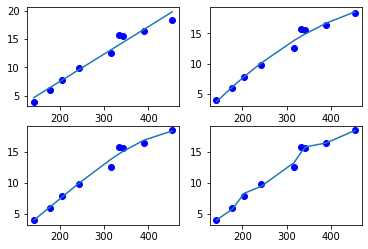

In [4]:
# 通过矩阵法实现最小二乘法
def least_sqaure(X, Y):
    return (X.T * X).I * X.T * Y

# 生成多项式
def polynomial(x, n):
    X = np.mat(x)
    X = np.append(np.ones((1, 9)), X, axis = 0)
    for i in range(1, n):
        X = np.append(X, np.mat(x**(i + 1)), axis = 0)
    return X.T

Y = np.mat(y).T

# 线性拟合
X = polynomial(x, 1)
beta = np.array(least_sqaure(X, Y)).flatten()[::-1]
print('beta:', beta)
plt.subplot(221)
plt.plot(x, y, 'bo', label='noise')
plt.plot(x, np.poly1d(beta)(x), label='fitted curve')

# 二次拟合
X = polynomial(x, 2)
beta = np.array(least_sqaure(X, Y)).flatten()[::-1]
print('beta:', beta)
plt.subplot(222)
plt.plot(x, y, 'bo', label='noise')
plt.plot(x, np.poly1d(beta)(x), label='fitted curve')

# 三次拟合
X = polynomial(x, 3)
beta = np.array(least_sqaure(X, Y)).flatten()[::-1]
print('beta:', beta)
plt.subplot(223)
plt.plot(x, y, 'bo', label='noise')
plt.plot(x, np.poly1d(beta)(x), label='fitted curve')

# 六次拟合
X = polynomial(x, 6)
beta = np.array(least_sqaure(X, Y)).flatten()[::-1]
print('beta:', beta)
plt.subplot(224)
plt.plot(x, y, 'bo', label='noise')
plt.plot(x, np.poly1d(beta)(x), label='fitted curve')

plt.show()